In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [54]:
"""
Rading data
"""
data = pd.read_csv("data/initial_data.csv", header=0)
label_col = "DriveTrain"
classes = data[label_col].unique()

# Primary analysis

In [32]:
"""
Numerical analysis
"""

print("Amount of examples: " + str(data.shape[0]))
print("Amount of festures: " + str(data.shape[1] - 1))
print("Number of classes: " + str(len(classes)))
print(classes)
categorical_features = [col for col in data.columns if data[col].dtype.name == 'object']
numerical_features = [col for col in data.columns if data[col].dtype.name != 'object']
print ("Categorical features (" + str(len(categorical_features)) +"):")
print(categorical_features)
print ("Numerical features (" + str(len(numerical_features)) +"):")
print (numerical_features)

Amount of examples: 93
Amount of festures: 26
Number of classes: 3
['Front' 'Rear' '4WD']
Categorical features (9):
['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
Numerical features (18):
['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


In [25]:
"""
Frequency analysis
"""
print(data[categorical_features].describe())
print(data[numerical_features].describe())

       Manufacturer   Model     Type      AirBags DriveTrain Cylinders  \
count            93      93       93           87         93        93   
unique           32      93        6            3          3         6   
top       Chevrolet  Spirit  Midsize  Driver only      Front         4   
freq              8       1       22           40         67        49   

       Man.trans.avail Origin           Make  
count               93     93             93  
unique               2      2             93  
top                Yes    USA  Nissan Altima  
freq                61     48              1  
       Min.Price      Price  Max.Price   MPG.city  MPG.highway  EngineSize  \
count  93.000000  93.000000  93.000000  87.000000    93.000000   93.000000   
mean   17.125806  19.509677  21.898925  22.333333    29.086022    2.667742   
std     8.746029   9.659430  11.030457   5.474394     5.331726    1.037363   
min     6.700000   7.400000   7.900000  15.000000    20.000000    1.000000   
25% 

In [55]:
"""
Numerical analysis of classes
"""
print("Amount of classes examples:")
for label in classes:
    print(label + ": " + str(data[data[label_col] == label].shape[0]))


   

Amount of classes examples:
Front: 67
Rear: 16
4WD: 10


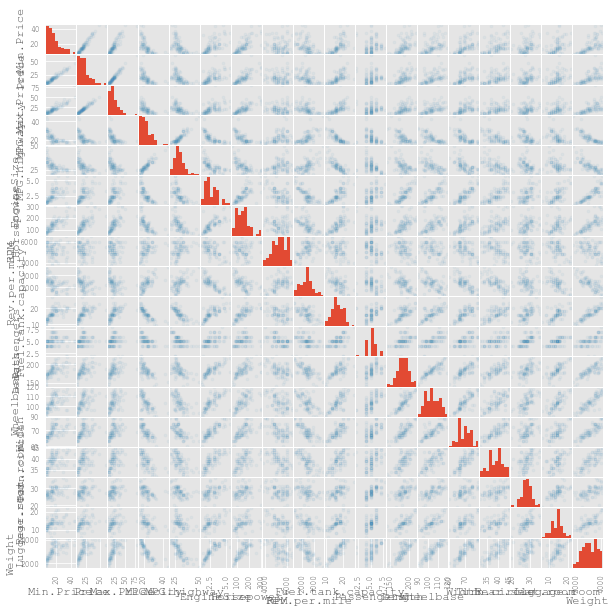

In [73]:
"""
Hustogram of numerical featueres correlation
"""
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[numerical_features], alpha=0.05, figsize=(10, 10));

In [44]:
data[numerical_features].corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.627936,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594505,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.544251,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.627936,-0.594505,-0.544251,1.000000,0.942018,-0.716820,-0.675983,0.352699,0.692767,-0.817732,-0.425482,-0.655678,-0.659838,-0.710455,-0.655732,-0.415756,-0.514575,-0.841192
MPG.highway,-0.579966,-0.560680,-0.522561,0.942018,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.716820,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.675983,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.352699,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.692767,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.817732,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


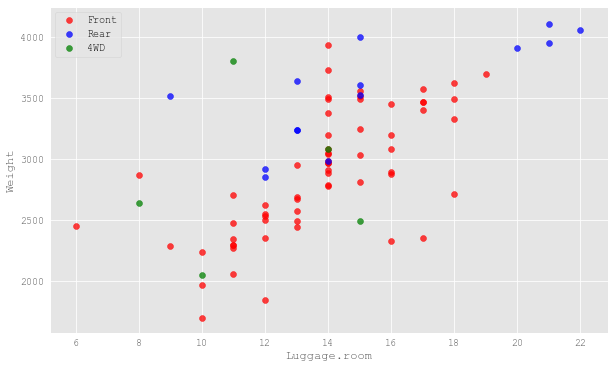

In [83]:
"""
Significance of features
"""
col1 = "Luggage.room"
col2 = "Weight"

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data[label_col] == classes[0]],
            data[col2][data[label_col] == classes[0]],
            alpha=0.75,
            color='red',
            label=classes[0])

plt.scatter(data[col1][data[label_col] == classes[1]],
            data[col2][data[label_col] == classes[1]],
            alpha=0.75,
            color='blue',
            label=classes[1])

plt.scatter(data[col1][data[label_col] == classes[2]],
            data[col2][data[label_col] == classes[2]],
            alpha=0.75,
            color='green',
            label=classes[2])

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best')
plt.show();